# Integrating Embeddings with Queries in an Information Retrieval System

## Objective

In this exercise, we will learn how to integrate embeddings with a query to enhance an Information Retrieval (IR) system. We will use both static and contextual embeddings to generate representations of queries and documents, compute their similarities, and rank the documents based on relevance to the query.

---

## Stages Covered

1. **Introduction to Pre-trained Transformer Models**
   - Load and use BERT for contextual embeddings.
   - Load and use Word2Vec for static embeddings.

2. **Generating Text Embeddings**
   - Generate embeddings for queries and documents using BERT.
   - Generate embeddings for queries and documents using Word2Vec.

3. **Computing Similarity Between Embeddings**
   - Compute cosine similarity between query and document embeddings.
   - Rank documents based on similarity scores.

4. **Integrating Embeddings with Queries**
   - Practical implementation of embedding-based retrieval for a given text corpus.

---

## Prerequisites

- TensorFlow
- Hugging Face's Transformers library
- Gensim library
- Scikit-learn library
- A text corpus in the `../data` folder

---

## Exercise

Follow the steps below to integrate embeddings with a query and enhance your IR system.



Step 0: Verify requirements:

* tensorflow
* transformers
* scikit-learn
* matplotlib
* seaborn

Step 1: Download dataset from Kaggle

URL: https://www.kaggle.com/datasets/zynicide/wine-reviews

In [3]:
import pandas as pd

#kaggle.api.dataset_download_cli(dataset='zynicide/wine-reviews')

wine_df = pd.read_csv('data/winemag-data_first150k.csv')
print(wine_df.head())
corpus = wine_df['description']

   Unnamed: 0 country                                        description  \
0           0      US  This tremendous 100% varietal wine hails from ...   
1           1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           2      US  Mac Watson honors the memory of a wine once ma...   
3           3      US  This spent 20 months in 30% new French oak, an...   
4           4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               

Step 2: Load a Pre-trained Transformer Model

Use the BERT model for generating contextual embeddings and Word2Vec for static embeddings.

In [4]:
import tensorflow as tf
import gensim.downloader as api
from transformers import BertTokenizer, TFBertModel

# Load pre-trained Word2Vec model
word2vec_model = api.load('word2vec-google-news-300')

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

c:\Users\carlo\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- T

Step 3: Generate Text Embeddings

Static Embeddings with Word2Vec

In [6]:
import numpy as np

def generate_word2vec_embeddings(texts):
    embeddings = []
    for text in texts:
        tokens = text.lower().split()
        word_vectors = [word2vec_model[word] for word in tokens if word in word2vec_model]
        if word_vectors:
            embeddings.append(np.mean(word_vectors, axis=0))
        else:
            embeddings.append(np.zeros(word2vec_model.vector_size))
    return np.array(embeddings)

word2vec_embeddings = generate_word2vec_embeddings(corpus[:10])
print("Word2Vec Embeddings:", word2vec_embeddings)
print("Word2Vec Shape:", word2vec_embeddings.shape)

Word2Vec Embeddings: [[ 0.01978664  0.03414721 -0.00884628 ... -0.01573336  0.06626587
  -0.02784729]
 [ 0.0016861  -0.00124741 -0.00065494 ... -0.04453754  0.06408358
   0.03221512]
 [-0.01758194  0.06408924  0.02408564 ... -0.04092503  0.09110224
   0.01769352]
 ...
 [ 0.02863665  0.00169689 -0.00209213 ... -0.05629005  0.11204083
   0.03335422]
 [ 0.03364817  0.00603784 -0.03152262 ... -0.0193573   0.12829183
  -0.00842387]
 [ 0.01875126  0.03864291  0.00552817 ... -0.07643094  0.06591528
   0.01740489]]
Word2Vec Shape: (10, 300)


Contextual Embeddings with BERT

In [7]:
def generate_bert_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors='tf', padding=True, truncation=True)
        outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state[:, 0, :])  # Use [CLS] token representation
    return np.array(embeddings).transpose(0,2,1)

bert_embeddings = generate_bert_embeddings(corpus[:10])
print("BERT Embeddings:", bert_embeddings)
print("Word2Vec Shape:", bert_embeddings.shape)

BERT Embeddings: [[[ 0.11967485]
  [-0.4885674 ]
  [ 0.36453065]
  ...
  [-0.436805  ]
  [ 0.11976148]
  [ 0.18947856]]

 [[-0.05186643]
  [-0.36506516]
  [ 0.6474595 ]
  ...
  [-0.31474546]
  [ 0.05560101]
  [ 0.51543313]]

 [[-0.73173153]
  [ 0.35088533]
  [-0.01913857]
  ...
  [-0.0338838 ]
  [ 0.22656612]
  [ 0.30798092]]

 ...

 [[-0.35893497]
  [-0.5862944 ]
  [ 0.4134213 ]
  ...
  [-0.16299428]
  [ 0.3321336 ]
  [ 0.49520734]]

 [[-0.061208  ]
  [-0.31861946]
  [ 0.6636804 ]
  ...
  [-0.260114  ]
  [ 0.22982544]
  [ 0.49291277]]

 [[-0.7911077 ]
  [-0.31794274]
  [ 0.24998897]
  ...
  [-0.42931435]
  [ 0.30838814]
  [-0.06678595]]]
Word2Vec Shape: (10, 768, 1)


Step 4: Compute Similarity Between Embeddings

Use the scikit-learn library.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity between Word2Vec embeddings
word2vec_similarity = cosine_similarity(word2vec_embeddings)
print("Word2Vec Cosine Similarity:\n", word2vec_similarity)

# Cosine similarity between BERT embeddings
bert_similarity = cosine_similarity(bert_embeddings.reshape(10,768))
print("BERT Cosine Similarity:\n", bert_similarity)

Word2Vec Cosine Similarity:
 [[1.         0.8253629  0.80511177 0.8419133  0.83916086 0.83854574
  0.8216922  0.8248522  0.84638995 0.8140328 ]
 [0.8253629  1.0000004  0.7915441  0.8704564  0.70442986 0.8919624
  0.85559994 0.9090055  0.82102585 0.8199145 ]
 [0.80511177 0.7915441  0.99999976 0.7813313  0.7663708  0.81088406
  0.76002795 0.7869289  0.7806283  0.82849413]
 [0.8419133  0.8704564  0.7813313  0.99999964 0.7388937  0.8769778
  0.8692663  0.86583847 0.8299481  0.81447786]
 [0.83916086 0.70442986 0.7663708  0.7388937  0.9999998  0.7408403
  0.7264281  0.7543802  0.84104794 0.73225087]
 [0.83854574 0.8919624  0.81088406 0.8769778  0.7408403  1.0000001
  0.86410356 0.9094129  0.8474779  0.8254898 ]
 [0.8216922  0.85559994 0.76002795 0.8692663  0.7264281  0.86410356
  0.99999976 0.87098914 0.8183166  0.7882399 ]
 [0.8248522  0.9090055  0.7869289  0.86583847 0.7543802  0.9094129
  0.87098914 0.9999997  0.86063915 0.83889055]
 [0.84638995 0.82102585 0.7806283  0.8299481  0.84104794

Step 5: Compare Contextual and Static Embeddings

Analyze and compare the similarity results from both BERT and Word2Vec embeddings.

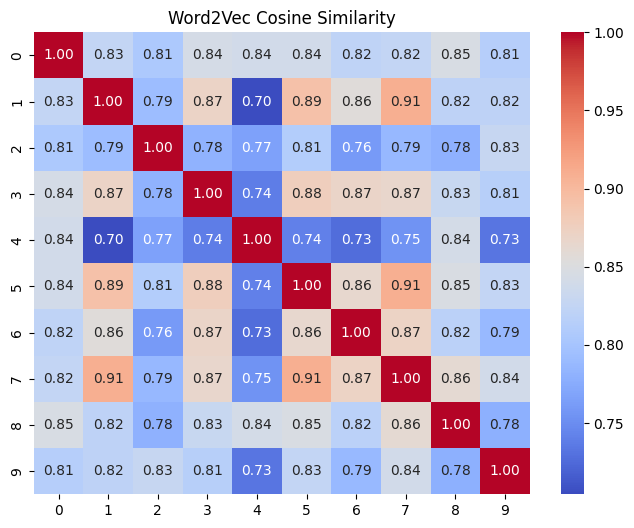

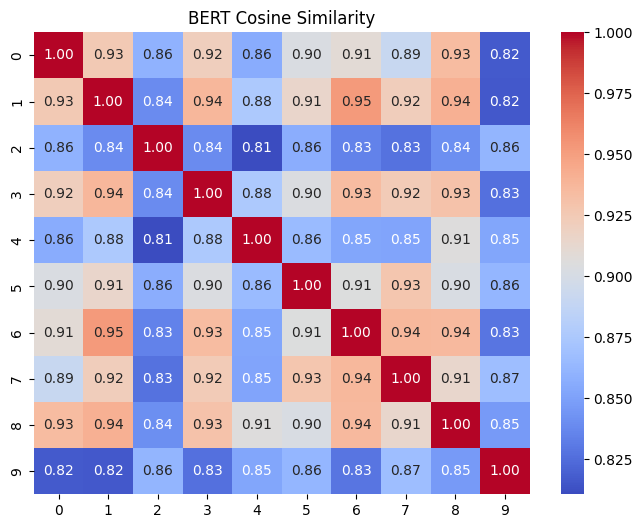

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(matrix, title, figsize=(8, 6), annotation=True):
    plt.figure(figsize=figsize)
    sns.heatmap(matrix, annot=annotation, cmap='coolwarm', fmt='.2f')
    plt.title(title)
    plt.show()

plot_similarity_matrix(word2vec_similarity, "Word2Vec Cosine Similarity")
plot_similarity_matrix(bert_similarity, "BERT Cosine Similarity")

Step 6: Applying to Corpus

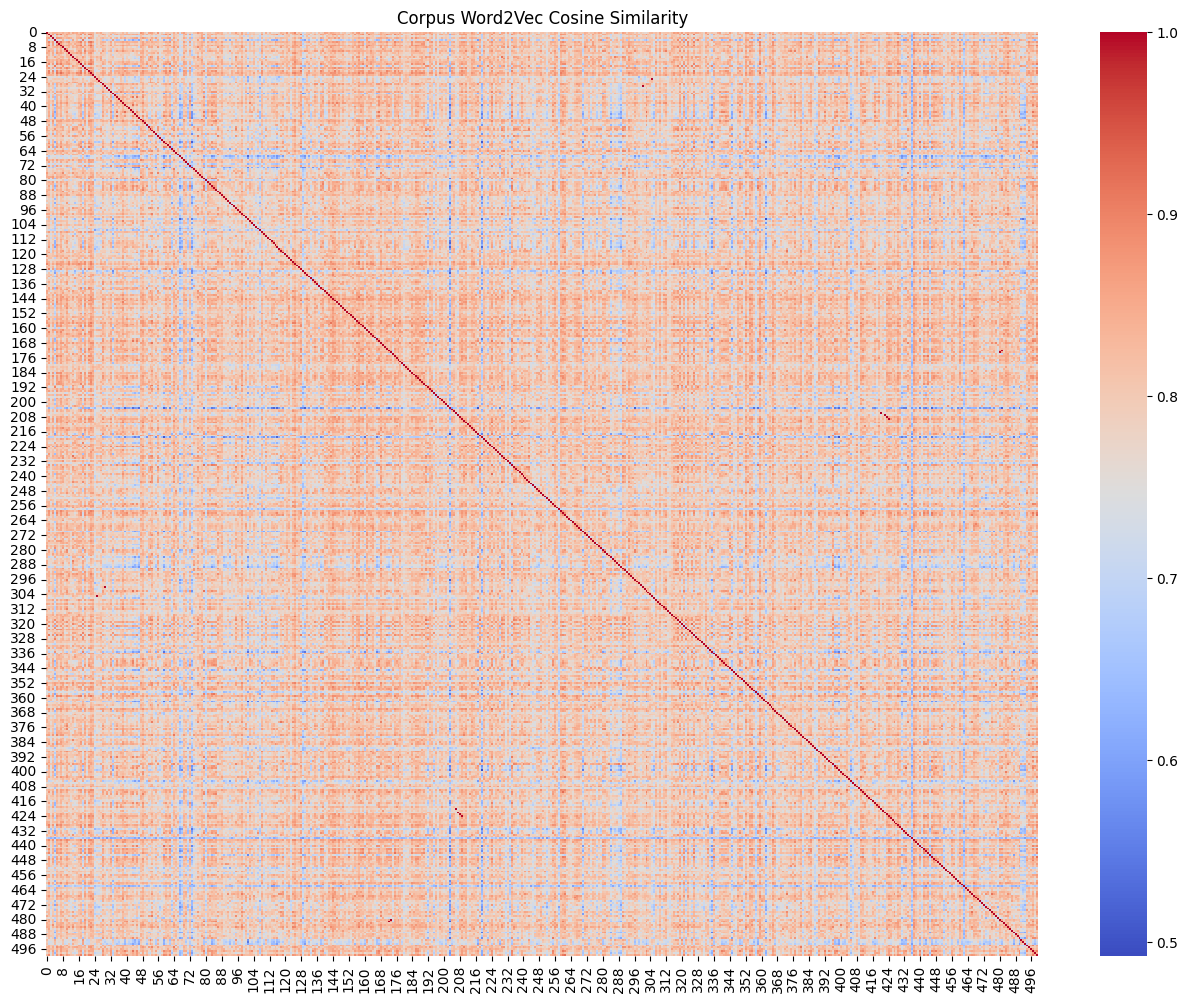

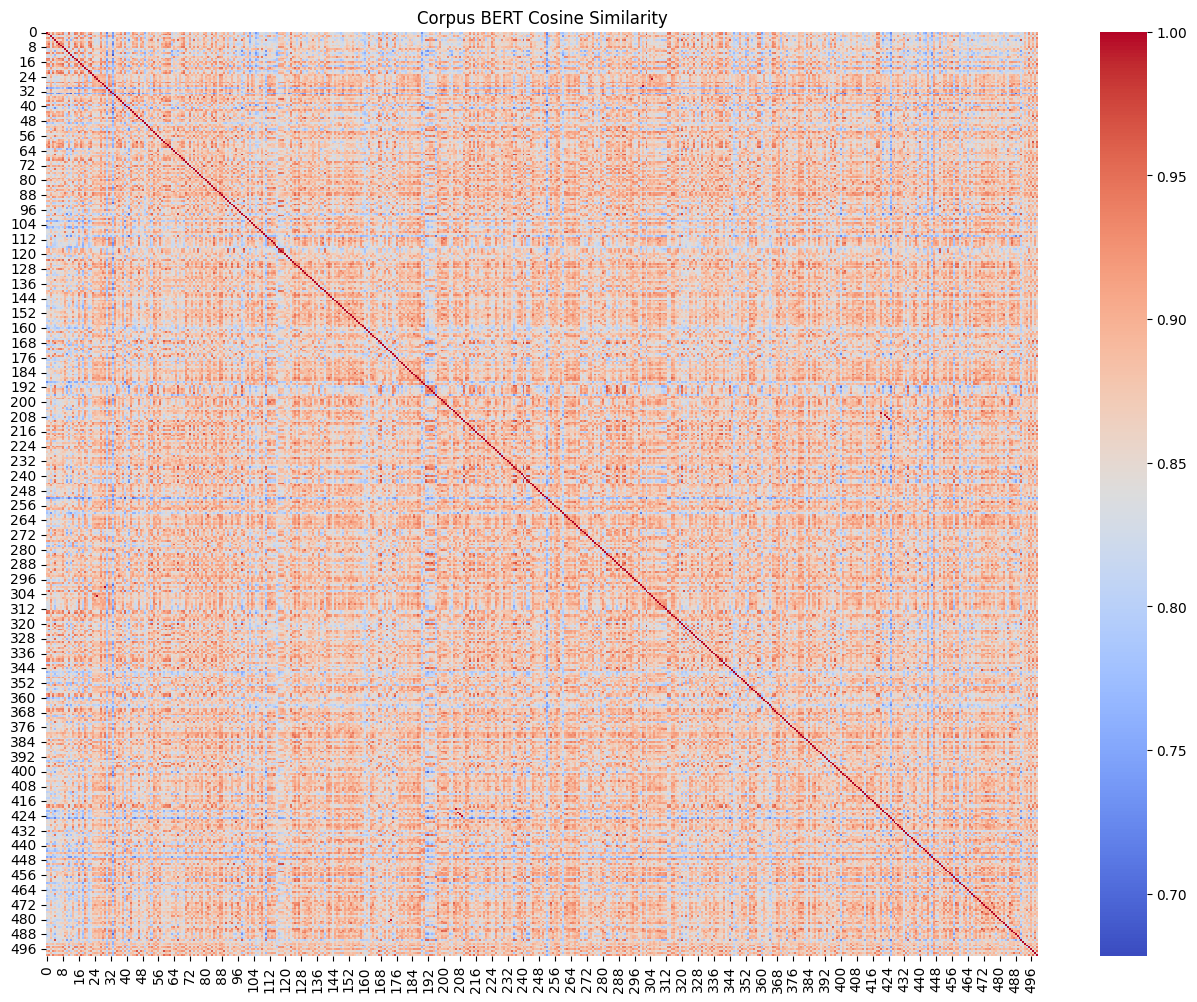

In [10]:
# Generate embeddings for the corpus
corpus_word2vec_embeddings = generate_word2vec_embeddings(corpus[:500])
corpus_bert_embeddings = generate_bert_embeddings(corpus[:500])

# Compute similarity for the corpus
corpus_word2vec_similarity = cosine_similarity(corpus_word2vec_embeddings)
corpus_bert_similarity = cosine_similarity(corpus_bert_embeddings.reshape(corpus_bert_embeddings.shape[:2]))

# Plot similarity matrices
plot_similarity_matrix(corpus_word2vec_similarity, "Corpus Word2Vec Cosine Similarity", figsize=(16, 12), annotation=False)
plot_similarity_matrix(corpus_bert_similarity, "Corpus BERT Cosine Similarity", figsize=(16, 12), annotation=False)

Summary

So far, in this exercise, you learned how to:

* Load a pre-trained transformer model (BERT) and a static embedding model (Word2Vec).
* Generate text embeddings using these models.
* Compute cosine similarity between embeddings.
* Compare the similarity results from both contextual and static embeddings.

Now you have a practical understanding of how transformers and embeddings can be used in Information Retrieval systems.

Let's integrate query search.

Step 7: Generate Embeddings for the Query

Generate embeddings for the query using the same model used for the documents.

In [14]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel

# consulta
query = ["A wine with floral notes and a hint of spice."]

query_embeddings = generate_bert_embeddings(query)

print("Embeddings de la consulta (BERT):", query_embeddings)



Embeddings de la consulta (BERT): [[[-3.58682036e-01]
  [-4.13601398e-01]
  [-6.18714333e-01]
  [ 2.37451971e-01]
  [-3.92577231e-01]
  [ 1.69521347e-02]
  [-4.84843075e-01]
  [ 3.89829159e-01]
  [ 4.29724492e-02]
  [ 3.08786854e-02]
  [-4.79984805e-02]
  [-5.26427850e-02]
  [-1.87504083e-01]
  [ 4.25516635e-01]
  [ 1.01258874e-01]
  [-1.28497422e-01]
  [-1.12211972e-01]
  [ 6.01036072e-01]
  [ 3.05822253e-01]
  [-5.47896624e-01]
  [ 3.51364374e-01]
  [-4.84193116e-01]
  [-4.86681193e-01]
  [ 1.87165022e-01]
  [-4.99212921e-01]
  [ 1.89463552e-02]
  [ 5.08813374e-02]
  [ 1.86451584e-01]
  [ 1.08373120e-01]
  [ 4.74320740e-01]
  [ 1.32300735e-01]
  [ 2.78661311e-01]
  [-4.32386398e-01]
  [-2.78561562e-01]
  [-1.88460097e-01]
  [ 3.42005119e-02]
  [ 4.64129239e-01]
  [-3.22546363e-02]
  [-3.37196499e-01]
  [ 3.44866276e-01]
  [-3.43852252e-01]
  [ 2.00354293e-01]
  [ 3.62312824e-01]
  [ 2.46880591e-01]
  [ 4.00625467e-01]
  [-4.21538323e-01]
  [-2.58459234e+00]
  [ 2.62854189e-01]
  [-2.

Step 8: Compute Similarity Between Query and Documents

Compute the similarity between the query embedding and each document embedding.

In [19]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

document_embeddings = bert_embeddings

def compute_similarity(query_embedding, document_embeddings):
    similarities = cosine_similarity(query_embedding, document_embeddings)
    return similarities

def flatten_embeddings(embeddings):
    return embeddings.reshape((embeddings.shape[0], -1))


document_embeddings_flat = flatten_embeddings(document_embeddings)
query_embeddings_flat = flatten_embeddings(query_embeddings)

# Calcular la similitud 
similarities = compute_similarity(query_embeddings_flat, document_embeddings_flat)
print("Similarities:", similarities)

sorted_indices = np.argsort(similarities[0])[::-1]
sorted_documents = [corpus[i] for i in sorted_indices]

print("Documents sorted by similarity to the query:")
for doc in sorted_documents:
    print(doc)

Similarities: [[0.73936623 0.76682913 0.77795076 0.73643994 0.75742304 0.7154104
  0.7328441  0.71990645 0.7586918  0.7198353 ]]
Documents sorted by similarity to the query:
Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.
Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.
This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black fruits. Accents of citrus and graphite comingle, with exceptional midpalate concentration. This is a wine 

Step 9: Retrieve and Rank Documents Based on Similarity Scores

Retrieve and rank the documents based on their similarity scores to the query.

In [20]:
print("Similarities:", similarities)

sorted_indices = np.argsort(similarities[0])[::-1]
sorted_documents = [corpus[i] for i in sorted_indices]
sorted_similarities = [similarities[0][i] for i in sorted_indices]

print("Documents sorted by similarity to the query:")
for doc, score in zip(sorted_documents, sorted_similarities):
    print(f"Document: {doc}\nSimilarity Score: {score}\n")

Similarities: [[0.73936623 0.76682913 0.77795076 0.73643994 0.75742304 0.7154104
  0.7328441  0.71990645 0.7586918  0.7198353 ]]
Documents sorted by similarity to the query:
Document: Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote and orange peel flavors, reveling in the succulence of its 122 g/L of residual sugar.
Similarity Score: 0.7779507637023926

Document: Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.
Similarity Score: 0.7668291330337524

Document: This re-named vineyard was formerly bottled as deLancellotti. You'll find striking minerality underscoring chunky black 